*David Schlangen, 2019-07-05*

# How to View the Dialogues


This notebook illustrates how to work with the logfiles of the dialogue experiments.

In [1]:
import sys

from glob import glob
import os.path

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.set_option('max_colwidth', -1)

sys.path.append('./code')
from slurk_utils import logs_to_dfs, postproc_df, pp, parse_event_mu, reformat_dial_pp, plot_ade_row

In [2]:
# if you want to look at what the players saw, you must download the ADE20k corpus,
# and point this environment variable to where it is on your system.
os.environ['ADE_20k_PATH'] = '/Volumes/SSD_500/Corpora/External/ImageCorpora/ADE20K_2016_07_26/images/'

In [3]:
mu_path = './data/meetupX'

dial_days = [
    '2018-11-29',
    '2018-11-30',
    '2018-12-01',
    '2018-12-02']

dials = [p for s in [glob(os.path.join(mu_path, good_dial, '*log')) for good_dial in dial_days] for p in s]

dial, meta_data = logs_to_dfs(dials, parser=parse_event_mu)
dial = [postproc_df(this_df) for this_df in dial]

In [4]:
len(dial)

430

This loads the logfiles into an easy to work with DataFrame format:

In [5]:
dial[20][30:40]

,msg,time,user,A_type,B_type,m-type,receiver,A_inst,B_inst,userID
30,cmd: w,00:00:53,A,/s/street,/s/staircase,command,All,/s/street/ADE_train_00016913.jpg,/s/staircase/ADE_train_00016780.jpg,84
31,url: /p/patio/ADE_train_00015292.jpg,00:00:53,GM,/p/patio,/s/staircase,new_image,A,/p/patio/ADE_train_00015292.jpg,/s/staircase/ADE_train_00016780.jpg,43
32,cmd: new_image,00:00:53,GM,/p/patio,/s/staircase,command,All,/p/patio/ADE_train_00015292.jpg,/s/staircase/ADE_train_00016780.jpg,43
33,You can go: [/s]outh [/e]ast,00:00:53,GM,/p/patio,/s/staircase,text,A,/p/patio/ADE_train_00015292.jpg,/s/staircase/ADE_train_00016780.jpg,43
34,cmd: s,00:00:57,A,/p/patio,/s/staircase,command,All,/p/patio/ADE_train_00015292.jpg,/s/staircase/ADE_train_00016780.jpg,84
35,url: /s/staircase/ADE_train_00016837.jpg,00:00:57,GM,/s/staircase,/s/staircase,new_image,A,/s/staircase/ADE_train_00016837.jpg,/s/staircase/ADE_train_00016780.jpg,43
36,cmd: new_image,00:00:57,GM,/s/staircase,/s/staircase,command,All,/s/staircase/ADE_train_00016837.jpg,/s/staircase/ADE_train_00016780.jpg,43
37,You can go: [/n]orth [/e]ast,00:00:57,GM,/s/staircase,/s/staircase,text,A,/s/staircase/ADE_train_00016837.jpg,/s/staircase/ADE_train_00016780.jpg,43
38,I'm in a room with a staircase that goes up left to right. It has a potted plant at the base of the stairs and a table next to the plant with a lamp on it.,00:01:26,B,/s/staircase,/s/staircase,text,All,/s/staircase/ADE_train_00016837.jpg,/s/staircase/ADE_train_00016780.jpg,85
39,"hi partner, are you here in the meetup room?",00:01:31,A,/s/staircase,/s/staircase,text,All,/s/staircase/ADE_train_00016837.jpg,/s/staircase/ADE_train_00016780.jpg,84


We provide some convenience functions that make this a little bit easier to read. (This is particularly nice if you run this in Jupyter Lab, where you can open a separate view of an output cell, so you can put the transcript next to the main notebook.)

In [6]:
this_dial = dial[186]
reformat_dial_pp(this_dial)

r/reading_room


,time,A-private,public,B-private,user,receiver
10,0 days 00:00:05,GM: url: / k/ kennel/ outdoor/ ADE_train_00010104.jpg,,,GM,A
12,0 days 00:00:05,GM: You can go: [/ s]outh,,,GM,A
13,0 days 00:00:05,"GM: Welcome to the game, homeless_picture_frame! You can always type the command/ look to see viable directions you can walk to. Type / doneif you think both of you are in the same room.",,,GM,A
14,0 days 00:00:05,GM: You have to meet in the room of type: r/ reading_room,,,GM,A
15,0 days 00:00:05,,,GM: url: / f/ flea_market/ outdoor/ ADE_train_00007957.jpg,GM,B
17,0 days 00:00:06,,,GM: You can go: [/ n]orth,GM,B
18,0 days 00:00:06,,,"GM: Welcome to the game, screeching_shoelace! You can always type the command/ look to see viable directions you can walk to. Type / doneif you think both of you are in the same room.",GM,B
19,0 days 00:00:06,,,GM: You have to meet in the room of type: r/ reading_room,GM,B
20,0 days 00:00:12,A: cmd: n,,,A,All
21,0 days 00:00:12,GM: Nothing happened.You can go: [/ s]outh,,,GM,A


None

If you want to see what the players saw at a particular point in the interaction, just provide the line in the transcript to the following function. (This only works if you have access to the ADE20k images, obviously; and if you have set the environment variable as described above.)

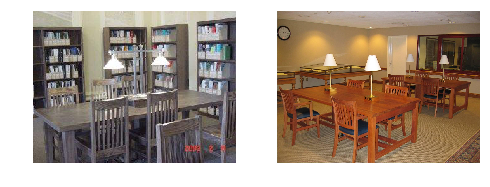

In [7]:
plot_ade_row(this_dial, 72)